In [1]:
#Plot a graph from a CSV file using matplotlib
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [2]:
Scenario = input("Enter the scenario you want to plot: ")

     r       e     y  AnnualEmissions
0  RE1  EMIC02  2015        651263.08
1  RE1  EMIC02  2016        652609.22
2  RE1  EMIC02  2017        667192.70
3  RE1  EMIC02  2018        684898.72
4  RE1  EMIC02  2019        707418.51


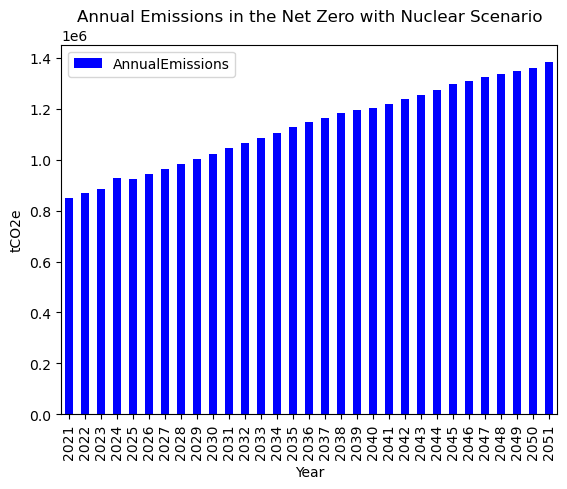

<Figure size 640x480 with 0 Axes>

In [3]:
#Plot Annual Emissions

df=pd.read_csv('AnnualEmissions.csv')
print(df.head())

years=[]
for i in range(2021,2052):
    years.append(i)
df = df[df['y'].isin(years)]
df.plot(kind='bar',x='y',y='AnnualEmissions',color='blue')
plt.xlabel('Year')
plt.ylabel('tCO2e')
plt.title('Annual Emissions in the ' + Scenario + ' Scenario')
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('Annual Emissions in the ' + Scenario + ' Scenario.png')

     r          t       f     y  ProductionByTechnologyAnnual
0  RE1  DEMCOMELC  COMELC  2015                      169.2528
1  RE1  DEMCOMELC  COMELC  2016                      179.0399
2  RE1  DEMCOMELC  COMELC  2017                      187.4280
3  RE1  DEMCOMELC  COMELC  2018                      195.8162
4  RE1  DEMCOMELC  COMELC  2019                      204.2043


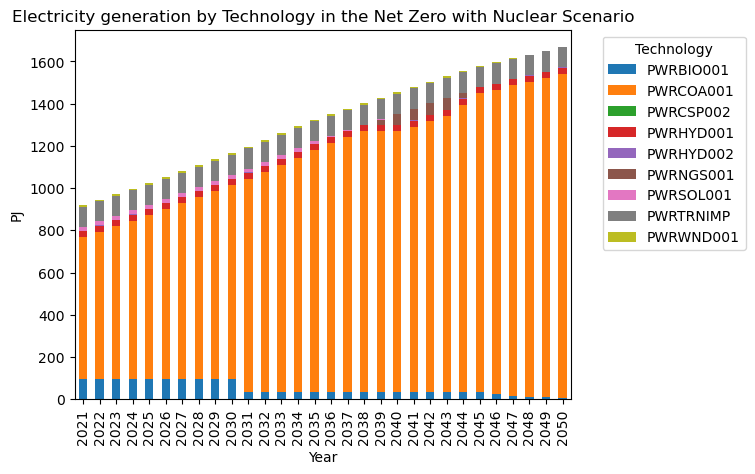

<Figure size 640x480 with 0 Axes>

In [4]:
#Plot Production by Technology

df=pd.read_csv('ProductionByTechnologyAnnual.csv')
print(df.head())

technologies=["PWRBIO001","PWRCOA001","PWRGEO","PWROHC001","PWROHC002","PWRNGS001","PWRNGS002","PWRSOL001","PWRCSP002","PWRHYD001","PWRHYD002","PWRHYD003","PWRWND001","PWRWND002","PWRNUC","PWRSOL001S","PWRWND001S","PWRTRNIMP"]
years=[]
for i in range(2021,2051):
    years.append(i)
df = df[df['t'].isin(technologies)]
df = df[df['y'].isin(years)]
df = df.pivot_table(index='y', columns='t', values='ProductionByTechnologyAnnual')
df.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('PJ')
plt.title('Electricity generation by Technology in the ' + Scenario + ' Scenario')
legend=plt.legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')
fig2 = plt.gcf()
plt.show()
plt.draw()
fig2.savefig('Electricity generation by Technology in the ' + Scenario + ' Scenario.png', bbox_extra_artists=(legend,), bbox_inches='tight')

In [5]:
#plot productino by technology aggregated by fuel type

df=pd.read_csv('ProductionByTechnologyAnnual.csv')
print(df.head())
technologies=["PWRBIO001","PWRCOA001","PWRGEO","PWROHC001","PWROHC002","PWRNGS001","PWRNGS002","PWRSOL001","PWRCSP002","PWRHYD001","PWRHYD002","PWRHYD003","PWRWND001","PWRWND002","PWRNUC","PWRSOL001S","PWRWND001S","PWRTRNIMP"]
years=[]
for i in range(2024,2051):
    years.append(i)
df = df[df['t'].isin(technologies)]
df = df[df['y'].isin(years)]
df = df.pivot_table(index='y', columns='t', values='ProductionByTechnologyAnnual')
#add the columns PWRWND001, PWRWND002 and PWRWND001S to get the total wind production
df['Wind'] = df['PWRWND001'] + df['PWRWND002'] + df['PWRWND001S']
#add the columns PWRSOL001 and PWRCSP002 to get the total solar production
df['Solar'] =  df['PWRSOL001S'] + df['PWRSOL001']
#add the columns PWRHYD001, PWRHYD002 and PWRHYD003 to get the total hydro production
df['Hydro'] = df['PWRHYD001'] + df['PWRHYD002'] + df['PWRHYD003']
#create a column with the oil technologies PWROHC001 and PWROHC002 if they are in the dataframe
df['Oil'] = 0
for t in technologies:
    if t in {'PWROHC001','PWROHC002'} and t in df.columns:
        df['Oil'] += df[t]
#same for natural gas
df['Natural Gas'] = 0
for t in technologies:
    if t in {'PWRNGS001','PWRNGS002'} and t in df.columns:
        df['Natural Gas'] += df[t]
#rename the columns to the fuel type
df = df.rename(columns={'PWRBIO001':'Biomass','PWRCOA001':'Coal','PWRGEO':'Geothermal','PWRNUC':'Nuclear','PWRTRNIMP':'Electricity Imports','PWRCSP002' : 'CSP'})
columns_to_drop = ['PWRWND001', 'PWRWND002', 'PWRWND001S', 'PWRSOL001', 'PWRHYD001', 'PWRHYD002', 'PWRHYD003', 'PWRSOL001S', 'PWRNGS001', 'PWRNGS002', 'PWROHC001', 'PWROHC002']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=columns_to_drop)
df.plot(kind='bar', stacked=True)
plt.title('Electricity generation by category in the' + Scenario + ' Scenario')
legend=plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
fig4 = plt.gcf()
plt.show()
plt.draw()
fig4.savefig('Electricity generation by category in the ' + Scenario + ' Scenario.png',  bbox_extra_artists=(legend,), bbox_inches='tight')

     r          t       f     y  ProductionByTechnologyAnnual
0  RE1  DEMCOMELC  COMELC  2015                      169.2528
1  RE1  DEMCOMELC  COMELC  2016                      179.0399
2  RE1  DEMCOMELC  COMELC  2017                      187.4280
3  RE1  DEMCOMELC  COMELC  2018                      195.8162
4  RE1  DEMCOMELC  COMELC  2019                      204.2043


KeyError: 'PWRWND002'

     r           t       f     y  ProductionByTechnologyAnnual
0  RE1  COMENEFFDP  COMELC  2021                       19.3811
1  RE1  COMENEFFDP  COMELC  2022                       38.7620
2  RE1  COMENEFFDP  COMELC  2023                       58.1430
3  RE1  COMENEFFDP  COMELC  2024                       77.5239
4  RE1  COMENEFFDP  COMELC  2025                       96.9050
[1148.6788999999999, 1266.0223999999998, 1304.7096, 1382.2118, 1462.4081, 1563.5748999999998, 1627.8722, 1753.0453, 1817.8799999999999, 1947.0977000000003, 2077.6339000000003, 2206.1987, 2329.5088, 2457.0178, 2579.4948999999997, 2697.9458000000004, 2830.1917000000003, 2981.9624000000003, 3184.1371000000004, 3393.2911000000004, 3588.5751999999998, 3769.7735, 3942.4034000000006, 4159.472, 4359.3898, 4653.6578, 4998.3807]


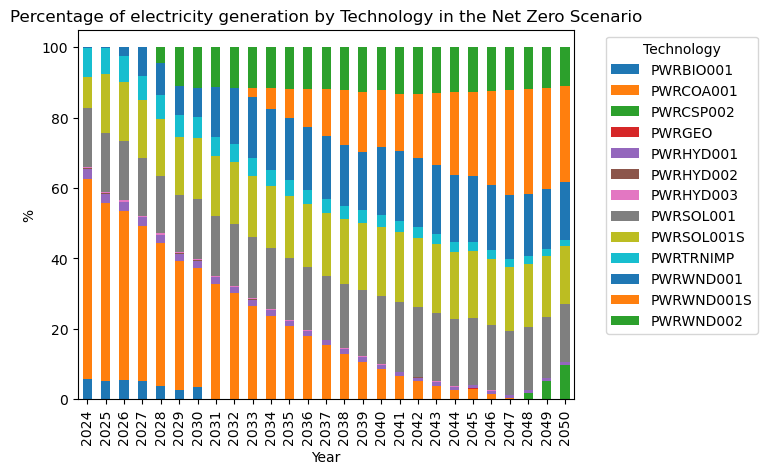

<Figure size 640x480 with 0 Axes>

In [ ]:
#Plot %Production by Technology

df=pd.read_csv('ProductionByTechnologyAnnual.csv')
print(df.head())

technologies=["PWRBIO001","PWRCOA001","PWRGEO","PWROHC001","PWROHC002","PWRNGS001","PWRNGS002","PWRSOL001","PWRCSP002","PWRHYD001","PWRHYD002","PWRHYD003","PWRWND001","PWRWND002","PWRNUC","PWRSOL001S","PWRWND001S","PWRTRNIMP"]
years=[]
for i in range(2024,2051):
    years.append(i)
df = df[df['t'].isin(technologies)]
df = df[df['y'].isin(years)]
df = df.pivot_table(index='y', columns='t', values='ProductionByTechnologyAnnual')
#create an array with the sum of production per year
sums = []
for i in range(2024,2051):
    sums.append(df.loc[i].sum())
print(sums)
#divide each value of the df by the sum of the year
df = df.div(sums, axis=0)
df = df*100


df.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('%')
plt.title('Percentage of electricity generation by Technology in the ' + Scenario + ' Scenario')
legend=plt.legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')
fig2 = plt.gcf()
plt.show()
plt.draw()
fig2.savefig('Percentage of electricity generation by Technology in the ' + Scenario + ' Scenario.png', bbox_extra_artists=(legend,), bbox_inches='tight')

     r       t     y  TotalCapacityAnnual
0  RE1  MINOIL  2020            2141.6499
1  RE1  MINBIO  2015            1097.6423
2  RE1  MINBIO  2016            1029.2793
3  RE1  MINBIO  2017            1043.3476
4  RE1  MINBIO  2018            1069.9028


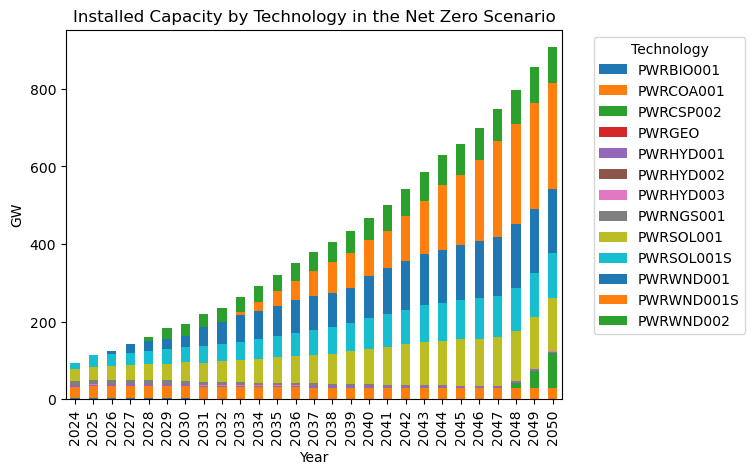

<Figure size 640x480 with 0 Axes>

In [ ]:
#Plot New Capacity by Technology

df=pd.read_csv('TotalCapacityAnnual.csv')
print(df.head())

technologies=["PWRBIO001","PWRCOA001","PWRGEO","PWROHC001","PWROHC002","PWRNGS001","PWRNGS002","PWRSOL001","PWRCSP002","PWRHYD001","PWRHYD002","PWRHYD003","PWRWND001","PWRWND002","PWRNUC","PWRSOL001S","PWRWND001S"]
years=[]
for i in range(2024,2051):
    years.append(i)
df = df[df['t'].isin(technologies)]
df = df[df['y'].isin(years)]
df = df.pivot_table(index='y', columns='t', values='TotalCapacityAnnual')
df.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('GW')
plt.title('Installed Capacity by Technology in the ' + Scenario + ' Scenario')
legend=plt.legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')
fig3 = plt.gcf()
plt.show()
plt.draw()
fig3.savefig('Installed Capacity by Technology in the ' + Scenario + ' Scenario.png',  bbox_extra_artists=(legend,), bbox_inches='tight')

     r           t       f     y  UseByTechnologyAnnual
0  RE1  COMENEFFDP  ELC003  2021                14.9085
1  RE1  COMENEFFDP  ELC003  2022                29.8169
2  RE1  COMENEFFDP  ELC003  2023                44.7254
3  RE1  COMENEFFDP  ELC003  2024                59.6338
4  RE1  COMENEFFDP  ELC003  2025                74.5423


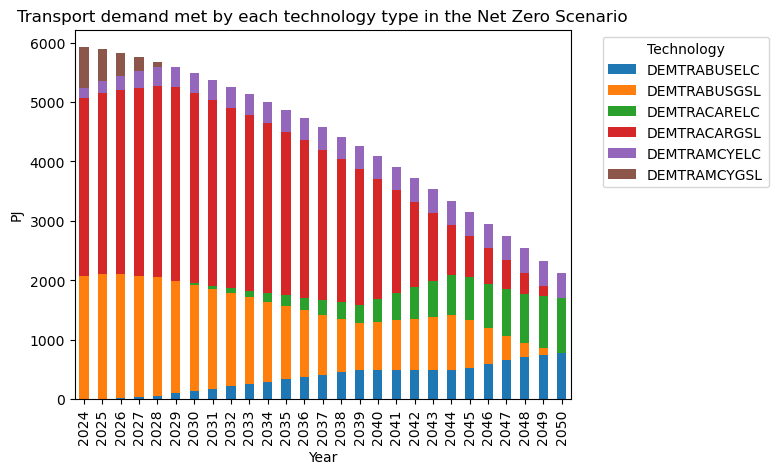

<Figure size 640x480 with 0 Axes>

In [ ]:
#Plot Demand in the transport sector

df=pd.read_csv('UseByTechnologyAnnual.csv')
print(df.head())

technologies=["DEMTRAMCYELC","DEMTRACARELC","DEMTRABUSELC","DEMTRAMCYGSL","DEMTRACARGSL","DEMTRABUSGSL"]
years=[]
for i in range(2024,2051):
    years.append(i)
df = df[df['t'].isin(technologies)]
df = df[df['y'].isin(years)]
df = df.pivot_table(index='y', columns='t', values='UseByTechnologyAnnual')
df.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('PJ')
plt.title('Transport demand met by each technology type in the ' + Scenario + ' Scenario')
legend=plt.legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')
fig4 = plt.gcf()
plt.show()
plt.draw()
fig4.savefig('Transport demand met by each technology type in the ' + Scenario + ' Scenario.png',  bbox_extra_artists=(legend,), bbox_inches='tight')

     r     l          t    f     y  ProductionByTechnology
0  RE1  S101     MINOIL  OIL  2020                 22.3089
1  RE1  S101     MINBIO  BIO  2020                 11.5768
2  RE1  S101     MINCOA  COA  2020                 16.0296
3  RE1  S101     IMPLFO  LFO  2020                 45.5091
4  RE1  S101  UPSREF001  LFO  2020                 20.0780


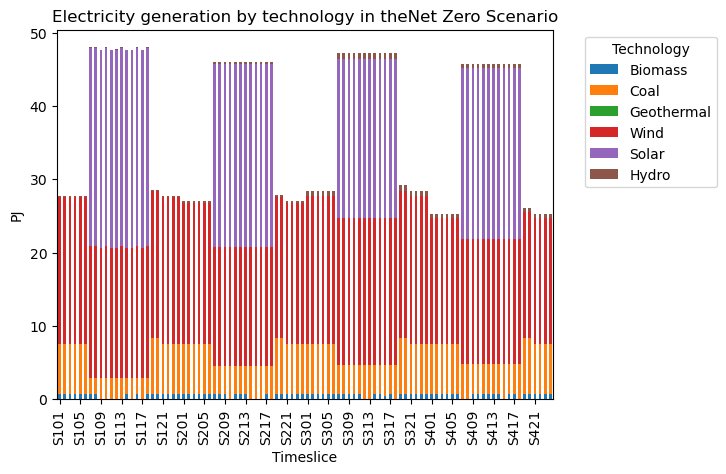

<Figure size 640x480 with 0 Axes>

In [ ]:
#Plot daily production for wind, solar and hydro

df=pd.read_csv('ProductionByTechnology.csv')
print(df.head())
technologies=["PWRBIO001","PWRCOA001","PWRGEO","PWROHC001","PWROHC002","PWRNGS001","PWRNGS002","PWRSOL001","PWRCSP002","PWRHYD001","PWRHYD002","PWRHYD003","PWRWND001","PWRWND002","PWRNUC","PWRSOL001S","PWRWND001S"]
years=[]
for i in range(2024,2051):
    years.append(i)
df = df[df['t'].isin(technologies)]
df = df[df['y'].isin(years)]
df = df.pivot_table(index='l', columns='t', values='ProductionByTechnology')
#add the columns PWRWND001, PWRWND002 and PWRWND001S to get the total wind production
df['Wind'] = df['PWRWND001'] + df['PWRWND002'] + df['PWRWND001S']
#add the columns PWRSOL001 and PWRCSP002 to get the total solar production
df['Solar'] = df['PWRSOL001'] + df['PWRCSP002']+ df['PWRSOL001S']
#add the columns PWRHYD001, PWRHYD002 and PWRHYD003 to get the total hydro production
df['Hydro'] = df['PWRHYD001'] + df['PWRHYD002'] + df['PWRHYD003']
#rename the column biomass, coal, gas, oil, nuclear
df.rename(columns={'PWRBIO001':'Biomass', 'PWRCOA001':'Coal', 'PWRGEO':'Geothermal', 'PWROHC001':'Oil', 'PWROHC002':'Gas', 'PWRNGS001':'Natural Gas', 'PWRNGS002':'Natural Gas', 'PWRNUC':'Nuclear'}, inplace=True)
df = df.drop(columns=['PWRWND001', 'PWRWND002', 'PWRWND001S', 'PWRSOL001', 'PWRCSP002', 'PWRHYD001', 'PWRHYD002', 'PWRHYD003', 'PWRSOL001S'])

df.plot(kind='bar', stacked=True)
plt.xlabel('Timeslice')
#only put one tick out of 4
plt.xticks(range(0, len(df.index), 4), df.index[::4])
plt.ylabel('PJ')
plt.title('Electricity generation by technology in the' + Scenario + ' Scenario')
legend=plt.legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')
fig4 = plt.gcf()
plt.show()
plt.draw()
fig4.savefig('Electricity generation by technology in the ' + Scenario + ' Scenario.png',  bbox_extra_artists=(legend,), bbox_inches='tight')

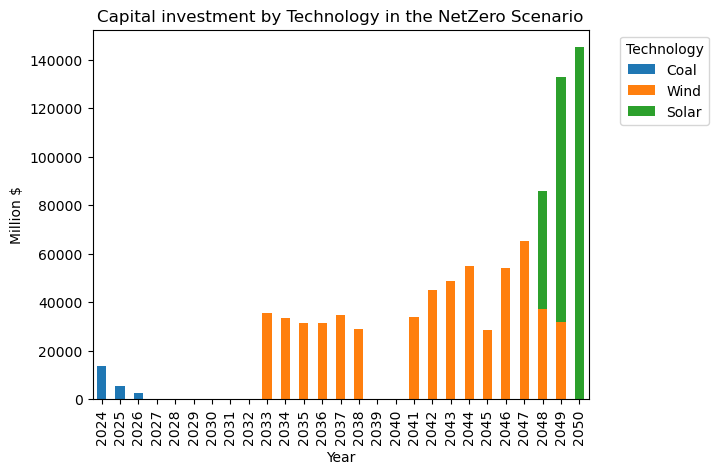

<Figure size 640x480 with 0 Axes>

In [ ]:
#Plot annual investment

df=pd.read_csv('CapitalInvestment.csv')

technologies=["PWRBIO001","PWRCOA001","PWRGEO","PWROHC001","PWROHC002","PWRNGS001","PWRNGS002","PWRSOL001","PWRCSP002","PWRHYD001","PWRHYD002","PWRHYD003","PWRWND001","PWRWND002","PWRNUC","PWRSOL001S","PWRWND001S"]
years=[]
for i in range(2024,2051):
    years.append(i)
df = df[df['t'].isin(technologies)]
df = df[df['y'].isin(years)]
df = df.pivot_table(index='y', columns='t', values='CapitalInvestment')
#add the columns PWRWND001, PWRWND002 and PWRWND001S to get the total wind production
df['Wind'] = df['PWRWND001'] + df['PWRWND002'] + df['PWRWND001S']
#add the columns PWRSOL001 and PWRCSP002 to get the total solar production
df['Solar'] = df['PWRSOL001'] + df['PWRCSP002']+ df['PWRSOL001S']
#rename the column biomass, coal, gas, oil, nuclear
df.rename(columns={'PWRBIO001':'Biomass', 'PWRCOA001':'Coal', 'PWRGEO':'Geothermal', 'PWROHC001':'Oil', 'PWROHC002':'Gas', 'PWRNGS001':'Natural Gas', 'PWRNGS002':'Natural Gas', 'PWRNUC':'Nuclear'}, inplace=True)
df = df.drop(columns=['PWRWND001', 'PWRWND002', 'PWRWND001S', 'PWRSOL001', 'PWRCSP002', 'PWRSOL001S'])

df.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Million $')
plt.title('Capital investment by Technology in the ' + Scenario + ' Scenario')
legend=plt.legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')
fig3 = plt.gcf()
plt.show()
plt.draw()
fig3.savefig('Capital Investment by Technology in the ' + Scenario + ' Scenario.png',  bbox_extra_artists=(legend,), bbox_inches='tight')